<a href="https://colab.research.google.com/github/Gianuzzi/Proc_de_Img_-DD2020/blob/main/Ejercicio1.1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libs

In [1]:
# Libs (no tocar)
import os
import sys
in_colab = 'google.colab' in sys.modules

if in_colab:
    from subprocess import getoutput
    getoutput("git clone -l -s https://gist.github.com/Gianuzzi/8500100a094ade398c55b827e55c6a3a cloned-repo")
    os.chdir('cloned-repo')
    import libs_PI
    os.chdir('/content')
    
from libs_PI import *

# Carga de imagen

Se debe otorgar el ``path`` al archivo. Puede ser un path del ordenador, o la URL de la imagen.

- En caso de que sea una URL, debe estar permitido el acceso a ella; de caso contrario, surgirá un error [HTTP_403](https://es.wikipedia.org/wiki/HTTP_403)
    - En el extraño caso que la imagen de la WEB no esté en formato png, jpg (o derivados), de debe especificar en ``formato``.


- En caso de que sea un path del ordenador, este debe sel el nombre completo. Ej. ``foto.bmp``)


Si se quiere guardar la imagen (luego de descargarla), se puede otorgar un nombre en ``d_name``.

- Si es un _string_ (nombre), este debe incluir el formato del archivo a guardar. Ej. ``foto.png``.

- Si se setea como cualquier otra cosa, se guardará el archivo como ``Imagen.jpg``



In [2]:
# Definir path 
path    = 'https://img.ti-media.net/wp/uploads/sites/46/2018/06/pride-month-920x563.jpg'
formato = None
d_name  = None

# Carga (NO TOCAR)
img = ReadIMG(path, formato=formato, d_name=d_name, in_colab=in_colab)

## Visualización y normalización

Se normaliza la imagen.
Tamaño de la imagen: (563, 920, 3)


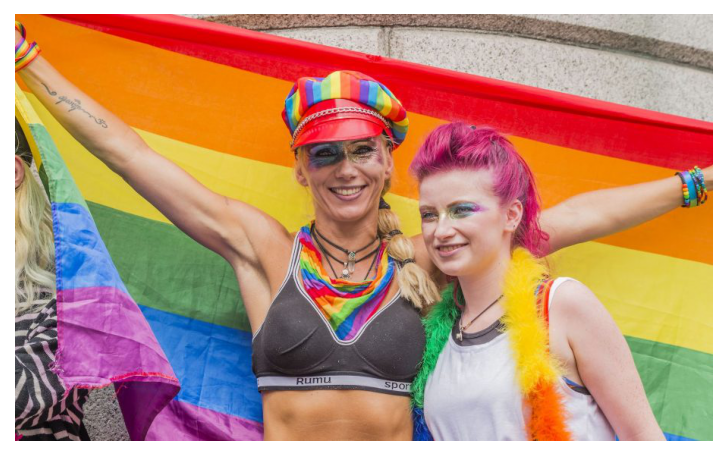

In [3]:
# Definimos RGB normalizado
if img.ravel().dtype not in (float, 'float32'): 
    print('Se normaliza la imagen.')
    img = img / 255.
if (len(img.shape)==3) and (img.shape[2]==4):
    img = RGBAtoRGB(img, verb=True)
print('Tamaño de la imagen:', img.shape) 

# Luminancias?
if len(img.shape)==2:
    print('Parece que la imagen no presenta colores.\n'+\
          '\t Se considera que es una imagen de luminancias.')
    print('Para operar, se convierte a imagen RGB')
    img = np.repeat(img[:,:,np.newaxis], 3, axis=2)

# Ploteo
plt.figure(dpi=150)
plt.axis('off')
plt.imshow(img)
plt.show()

## Procesamiento

### Transformación de imagen en RGB al espacio YIQ

In [4]:
YIQ = RGBtoYIQ(img, normed=True, verb=True) #Pasamos a YIQ

Se ha transformado de RGB a YIQ


### Modificación de imagen en espacio YIQ

Se modifica la imagen según los parámetros:
- alpha
- beta

In [5]:
alpha = 1.2
beta  = 0.4

YIQ_m = ModifyYIQ(YIQ, verb=True, alpha=alpha, beta=beta) #Modificamos a YIQ

Se ha multiplicado: Y * 1.2 ; I * 0.4 ; Q * 0.4


### Transformación de imagen en YIQ al espacio RGB

In [6]:
img_m = YIQtoRGB(YIQ_m, normed=True, verb=True) #Volvemos a RGB normalizado

Se ha transformado de YIQ a RGB


### Ploteo de comparación de imágenes

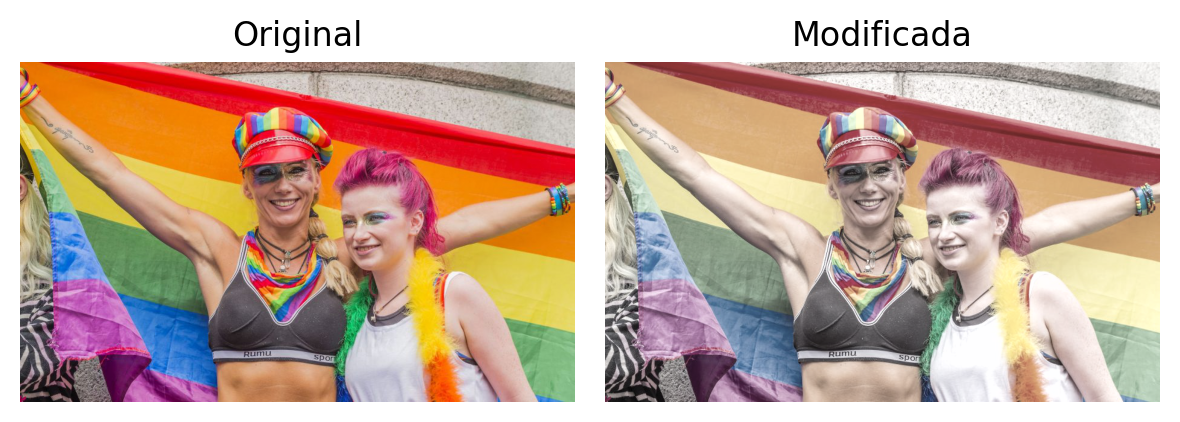

In [7]:
#Ploteamos
plt.figure(dpi=200)
plt.subplot(1,2,1)
plt.title('Original')
plt.axis('off')
plt.imshow(img)
plt.subplot(1,2,2)
plt.title('Modificada')
plt.axis('off')
plt.imshow(img_m)
plt.tight_layout()
plt.show()

# Guardado

Se debe especificar el nombre y formato.

In [8]:
nombre  = 'IMG_Ej1.1'
formato = 'jpg'

if not in_colab: 
    plt.imsave(nombre+'.'+formato, 
               (img_m*255).astype('uint8'),
               cmap=plt.cm.gray)